In [81]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import numpy 
import json
import requests
import numpy as np
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
# BBC, CBS, CNN, Fox, and New York times.
target_user = ['@BBC', '@CBS', "@CNN", "@FoxNews", "@nytimes"]
filename = ["bbc_sentiment", "cbs_sentiment", "cnn_sentiment", "fox_sentiment", "nyt_sentiment"]

In [58]:
def NewsOrg_sentiment(target):
    counter = 1
    sentiments = []
    public_tweet = api.user_timeline(target, count = 100 )
    
    for tweet in public_tweet :
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        
        counter = counter + 1
        
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending=False, inplace = True)  
    return  data

In [59]:
bbc_sentiment = NewsOrg_sentiment('@BBC')
cbs_sentiment = NewsOrg_sentiment('@CBS')
cnn_sentiment = NewsOrg_sentiment("@CNN")
fox_sentiment = NewsOrg_sentiment("@FoxNews")
nyt_sentiment = NewsOrg_sentiment("@nytimes")

In [103]:
# save each file into csv
# def savecsv(filename):
#     pd.to_csv()

In [104]:
bbc_sentiment.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
99,0.5848,Fri Mar 09 16:56:13 +0000 2018,0.0,0.807,0.193,100,"RT @bbcwritersroom: ""I felt like a real writer...",@BBC
98,0.3818,Fri Mar 09 16:56:32 +0000 2018,0.0,0.874,0.126,99,RT @bbcworldservice: These images of women on ...,@BBC
97,0.4939,Fri Mar 09 17:00:10 +0000 2018,0.0,0.656,0.344,98,Want to improve your persuasion powers? \n\n😻 ...,@BBC
96,0.0000,Fri Mar 09 17:18:55 +0000 2018,0.0,1.000,0.000,97,"RT @bbcthesocial: Instead of a plastic straw, ...",@BBC
95,0.5719,Fri Mar 09 18:00:10 +0000 2018,0.0,0.764,0.236,96,💘 @MabelMcVey covering @Coldplay's 'Fix You' i...,@BBC


In [72]:
def plotting_scatter(x, y, color, label) :  
    return plt.scatter(x, y, c = color, alpha = 0.5,  s = 200,  label = label)

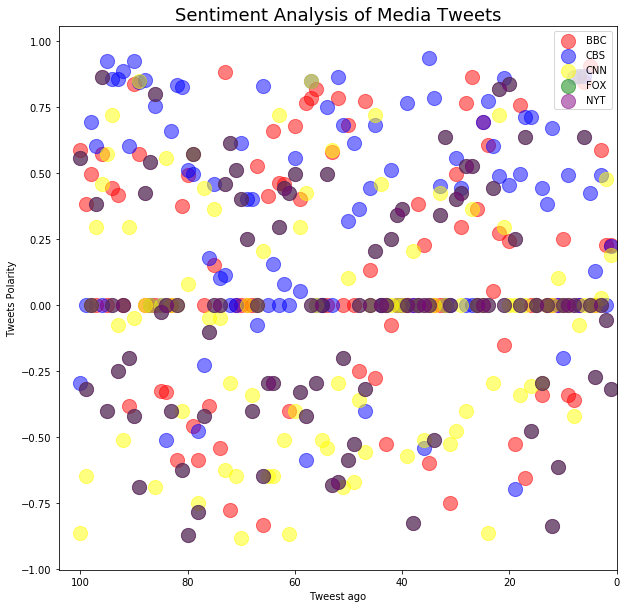

In [102]:
plt.figure(figsize =(10,10))

plotting_scatter(bbc_sentiment['Tweets ago'], bbc_sentiment['Compound'], "r", 'BBC')
plotting_scatter(cbs_sentiment['Tweets ago'], cbs_sentiment['Compound'], "b", 'CBS')
plotting_scatter(cnn_sentiment['Tweets ago'], cnn_sentiment['Compound'], "yellow", 'CNN')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "g", 'FOX')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "purple", 'NYT')

plt.legend(loc = "upper right")
plt.title("Sentiment Analysis of Media Tweets" ,fontsize = 18)
plt.xlabel("Tweest ago")
plt.ylabel("Tweets Polarity")
plt.xlim(104,-0.04)
plt.show()
#plt.savefig("Sentimental Analysis of Media Tweets")

In [84]:
x =  {
    "BBC" : np.mean(bbc_sentiment['Compound']), 
    "CBS" : np.mean(cbs_sentiment['Compound']),
    "CNN" : np.mean(cnn_sentiment['Compound']),
    "FOX": np.mean(fox_sentiment['Compound']),
    "NYT": np.mean(nyt_sentiment['Compound']) }
x

{'BBC': 0.13696900000000004,
 'CBS': 0.327577,
 'CNN': -0.06344400000000001,
 'FOX': 0.016046000000000005,
 'NYT': -0.06412299999999999}

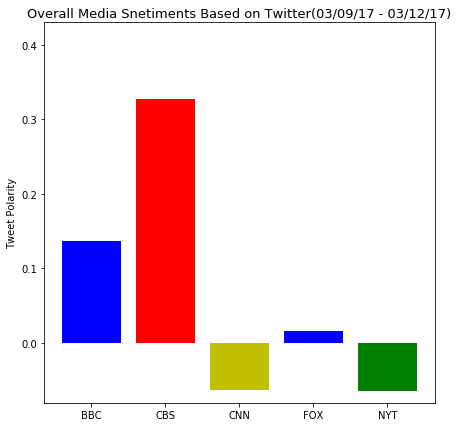

In [95]:
plt.figure(figsize = (7,7))
plt.bar(x.keys(), x.values(), color = ['b', 'r', 'y', 'b', 'g'])
plt.title('Overall Media Snetiments Based on Twitter(03/09/17 - 03/12/17)', fontsize = 13)
plt.ylabel("Tweet Polarity")
plt.ylim(-0.08, 0.43)
plt.show()
#plt.savefig("Overall Twitter Sentiments")